## 1)
Odor is very discriminative of edibility. We can see that each odor maps to mostly either edible or poisionous. Other discriminative features can be sporte-print-color, stalk-surface-below-ring or stalk-root.


![]('/home/hansk/Documents/Dataing3/Maskinlæring/oving6/2020-09-25_13-17.png')

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('./agaricus-lepiota.csv')
#train.head()

#data = pd.get_dummies(d) 

y = train.pop('edibility').values
X = train

#y = pd.get_dummies(y)
#X = pd.get_dummies(X)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (5443, 22) (5443,)
Test (2681, 22) (2681,)


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

Feature 0, cap-shape: 10.397708
Feature 1, cap-surface: 155.341114
Feature 2, cap-color: 10.623323
Feature 3, bruises?: 776.863709
Feature 4, odor: 73.306878
Feature 5, gill-attachment: 2.236022
Feature 6, gill-spacing: 582.399091
Feature 7, gill-size: 1070.687525
Feature 8, gill-color: 3904.241234
Feature 9, stalk-shape: 25.863510
Feature 10, stalk-root: 739.638652
Feature 11, stalk-surface-above-ring: 147.616648
Feature 12, stalk-surface-below-ring: 136.001199
Feature 13, stalk-color-above-ring: 86.400905
Feature 14, stalk-color-below-ring: 78.633218
Feature 15, veil-type: nan
Feature 16, veil-color: 3.299083
Feature 17, ring-number: 18.409995
Feature 18, ring-type: 1287.734355
Feature 19, spore-print-color: 231.222531
Feature 20, population: 206.417198
Feature 21, habitat: 551.890378


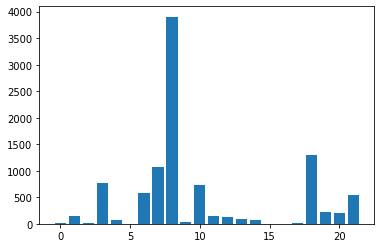

In [4]:
from matplotlib import pyplot

for i in range(len(fs.scores_)):
    print('Feature %d, %s: %f' % (i, X.columns[i], fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()